# **House Price Preiction: Exploratory Data Analysis**




For an in-depth Exploratory Data Analysis (EDA) on a property sale dataset, focus on understanding distributions and identifying data quality issues for features like room types (private or sharing), bedrooms, and prices. Visualizing relationships between these features and house prices can be done by using scatter plots, histograms, and box plots.

<a id="ch1"></a>
## Overview
<hr/>

The important step in understanding the data on home prices in Paris is **exploratory data analysis**. In this notebook, we will focus on **analyzing and visualizing the data** step by step by explaining most of the concepts used to understand why they are used.

<a id="ch2"></a>
## Dataset
<hr/>

* This dataset contains house sale prices on Airbnb listings in Paris.
* It includes 20 columns (features).
* 6689 rows.

***Feature Columns***
* **id:** Unique ID for each home.
* **room_type:** private, shared, etc
* **room_sharing:** Sharing or not(Boolean)
* **room_private:** Private or not(Boolean)
* **person_capacity:** Max no.of occupancy
* **host_status:** Host Super_host = high standard hospitality
* **multi_listing:** Price for multi listing or not
* **business_listing:** Price for Business purpose or not
* **cleanliness_rating:** Cleanliness rating
* **guest_satisfaction_rating:** Overall satisfaction rating
* **bedrooms:** Count, (0 for studio)
* **dist_city:** Distance from city center
* **dist_metro:** Distance from nearest metro
* **attr_index:** Attraction index
* **attr_index_norm:** Attraction index range(1 to 100)
* **rest_index:** Restaurant index
* **rest_index_norm:** Restaurant index range(1 to 100)
* **longitude:**	The longitude of the listing.
* **latitude:** The latitude of the listing.The latitude of the listing.
* **price:** Price of each home

In [81]:
!pip install skimpy

In [82]:
# Import necessary library
import numpy as np
import pandas as pd
from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [83]:
file_path = '/content/drive/MyDrive/Paris_housing_index.xlsx'


In [84]:
house_data = pd.read_excel(file_path)
house_data.head()

,id,room_type,room_sharing,room_private,person_capacity,host_status,multi_listing,business_listing,cleanliness_rating,guest_satisfaction_rating,bedrooms,dist_city,dist_metro,attr_index,attr_index_norm,rest_index,rest_index_norm,longitude,latitude,price
0,0,Entire home/apt,False,False,5,False,0,1,9,89,1,1.351201,0.212346,390.776774,19.001549,1030.738507,47.550371,2.35900,48.86800,536.396682
1,1,Private room,False,True,2,True,0,0,10,97,1,0.699821,0.193710,518.478270,25.211044,1218.658866,56.219575,2.35385,48.86282,290.101594
2,2,Entire home/apt,False,False,4,False,0,1,10,100,1,0.968982,0.294343,432.689942,21.039580,1069.894793,49.356741,2.36023,48.86375,445.754497
3,3,Private room,False,True,2,False,0,0,10,94,1,3.302319,0.234740,444.555284,21.616533,902.856370,41.650870,2.31714,48.87475,211.343089
4,4,Entire home/apt,False,False,2,True,0,0,9,88,1,1.402430,0.055052,1013.458689,49.279502,1348.063511,62.189313,2.33408,48.85384,266.334234


In [85]:
house_data.shape

(6688, 20)

In [86]:
#The features of dataset
print("The name of columns are: \n",house_data.columns)

The name of columns are: 
 Index(['id', 'room_type', 'room_sharing', 'room_private', 'person_capacity',
       'host_status', 'multi_listing', 'business_listing',
       'cleanliness_rating', 'guest_satisfaction_rating', 'bedrooms',
       'dist_city', 'dist_metro', 'attr_index', 'attr_index_norm',
       'rest_index', 'rest_index_norm', 'longitude', 'latitude', 'price'],
      dtype='object')


In [87]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6688 entries, 0 to 6687
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6688 non-null   int64  
 1   room_type                  6688 non-null   object 
 2   room_sharing               6688 non-null   bool   
 3   room_private               6688 non-null   bool   
 4   person_capacity            6688 non-null   int64  
 5   host_status                6688 non-null   bool   
 6   multi_listing              6688 non-null   int64  
 7   business_listing           6688 non-null   int64  
 8   cleanliness_rating         6688 non-null   int64  
 9   guest_satisfaction_rating  6688 non-null   int64  
 10  bedrooms                   6688 non-null   int64  
 11  dist_city                  6688 non-null   float64
 12  dist_metro                 6688 non-null   float64
 13  attr_index                 6688 non-null   float

The result shows the type of each characteristic. The majority of features are **float64**; however, there are also some **int64** features, such as multi_listing, business_listing, etc., **object**, and **bool** types.

In [88]:
# Calculate the frequency of each unique value in the 'bedrooms'
bedrooms_counts = house_data['bedrooms'].value_counts().sort_index()
bedrooms_counts

bedrooms
0    1295
1    4448
2     786
3     152
4       5
5       2
Name: count, dtype: int64

In [89]:
# Calculate the frequency of each unique value in the 'room_type'
RoomType_counts = house_data['room_type'].value_counts().sort_index()
RoomType_counts

room_type
Entire home/apt    5067
Private room       1527
Shared room          94
Name: count, dtype: int64

In [90]:
# Calculate the frequency of each unique value in the 'person_capacity'
Pcapacity_counts = house_data['person_capacity'].value_counts().sort_index()
Pcapacity_counts

person_capacity
2    3686
3     646
4    1728
5     236
6     392
Name: count, dtype: int64

**What is the distribution of numerical feature values across the samples?**

In [91]:
# Calculate descriptive statistics and transpose the result
desc_stats = house_data.describe().T

# Create a custom style function for the DataFrame visualization
def custom_style(val):
    # Alternate background color based on the value being positive or negative
    color = '#f7b267' if val < 0 else '#60acc5'
    return f'background-color: {color}; color: black'

# Apply the custom style to the whole DataFrame
styled_desc_stats = desc_stats.style.applymap(custom_style)

# Apply a gradient to the 'mean' column using 'YlGnBu' colormap
styled_desc_stats = styled_desc_stats.background_gradient(subset=['mean'], cmap='YlGnBu')

# Apply a gradient to the 'max' column using 'YlOrRd' colormap
styled_desc_stats = styled_desc_stats.background_gradient(subset=['max'], cmap='YlOrRd')

# Apply bold formatting to the 'min' column
styled_desc_stats = styled_desc_stats.set_properties(subset=['min'], **{'font-weight': 'bold'})

# Display the styled descriptive statistics DataFrame
styled_desc_stats


,count,mean,std,min,25%,50%,75%,max
id,6688.000000,3343.500000,1930.803632,0.000000,1671.750000,3343.500000,5015.250000,6687.000000
person_capacity,6688.000000,2.953648,1.215007,2.000000,2.000000,2.000000,4.000000,6.000000
multi_listing,6688.000000,0.219498,0.413937,0.000000,0.000000,0.000000,0.000000,1.000000
business_listing,6688.000000,0.245813,0.430601,0.000000,0.000000,0.000000,0.000000,1.000000
cleanliness_rating,6688.000000,9.263606,0.974036,2.000000,9.000000,9.000000,10.000000,10.000000
guest_satisfaction_rating,6688.000000,92.037530,8.818201,20.000000,89.000000,94.000000,98.000000,100.000000
bedrooms,6688.000000,0.972787,0.642571,0.000000,1.000000,1.000000,1.000000,5.000000
dist_city,6688.000000,2.995823,1.463542,0.071543,1.831552,2.997026,4.050558,7.703737
dist_metro,6688.000000,0.227323,0.122769,0.003220,0.142363,0.207317,0.290475,1.154777
attr_index,6688.000000,374.186582,159.494728,116.297506,262.319584,337.941264,456.269714,2056.552199


### **Missing Values**

***Which features contain blank, null or empty values?***

We can check for missing values with pandas isnull(). This indicates whether values are missing or not. Then we can sum all the values to check every column.

In [92]:
house_data.isnull().any()

id                           False
room_type                    False
room_sharing                 False
room_private                 False
person_capacity              False
host_status                  False
multi_listing                False
business_listing             False
cleanliness_rating           False
guest_satisfaction_rating    False
bedrooms                     False
dist_city                    False
dist_metro                   False
attr_index                   False
attr_index_norm              False
rest_index                   False
rest_index_norm              False
longitude                    False
latitude                     False
price                        False
dtype: bool

According to the result there are no missing values in all features.

## **Outliers**

<ipython-input-93-38ef7d796645>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data['price'], color='#004500')


Text(0.5, 1.0, 'Distribution of House Prices')

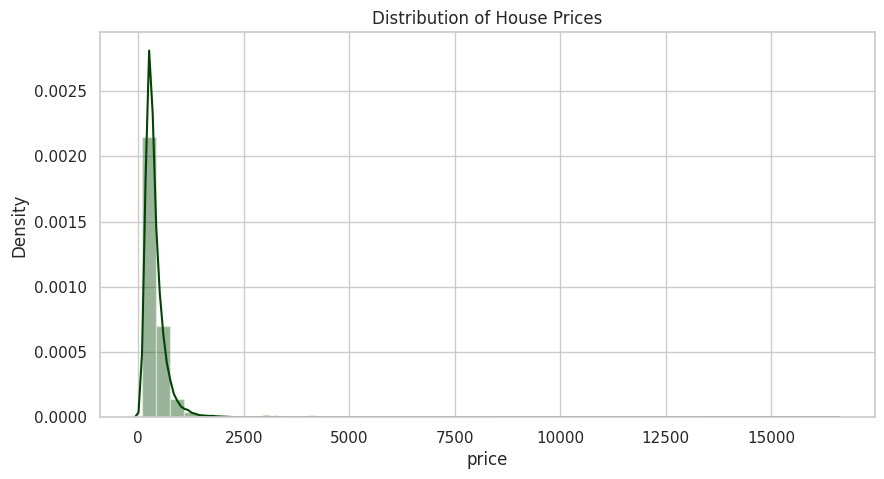

In [93]:
f, axes = plt.subplots(figsize=(10,5))
sns.distplot(house_data['price'], color='#004500')
# Add a title to the plot
axes.set_title('Distribution of House Prices')

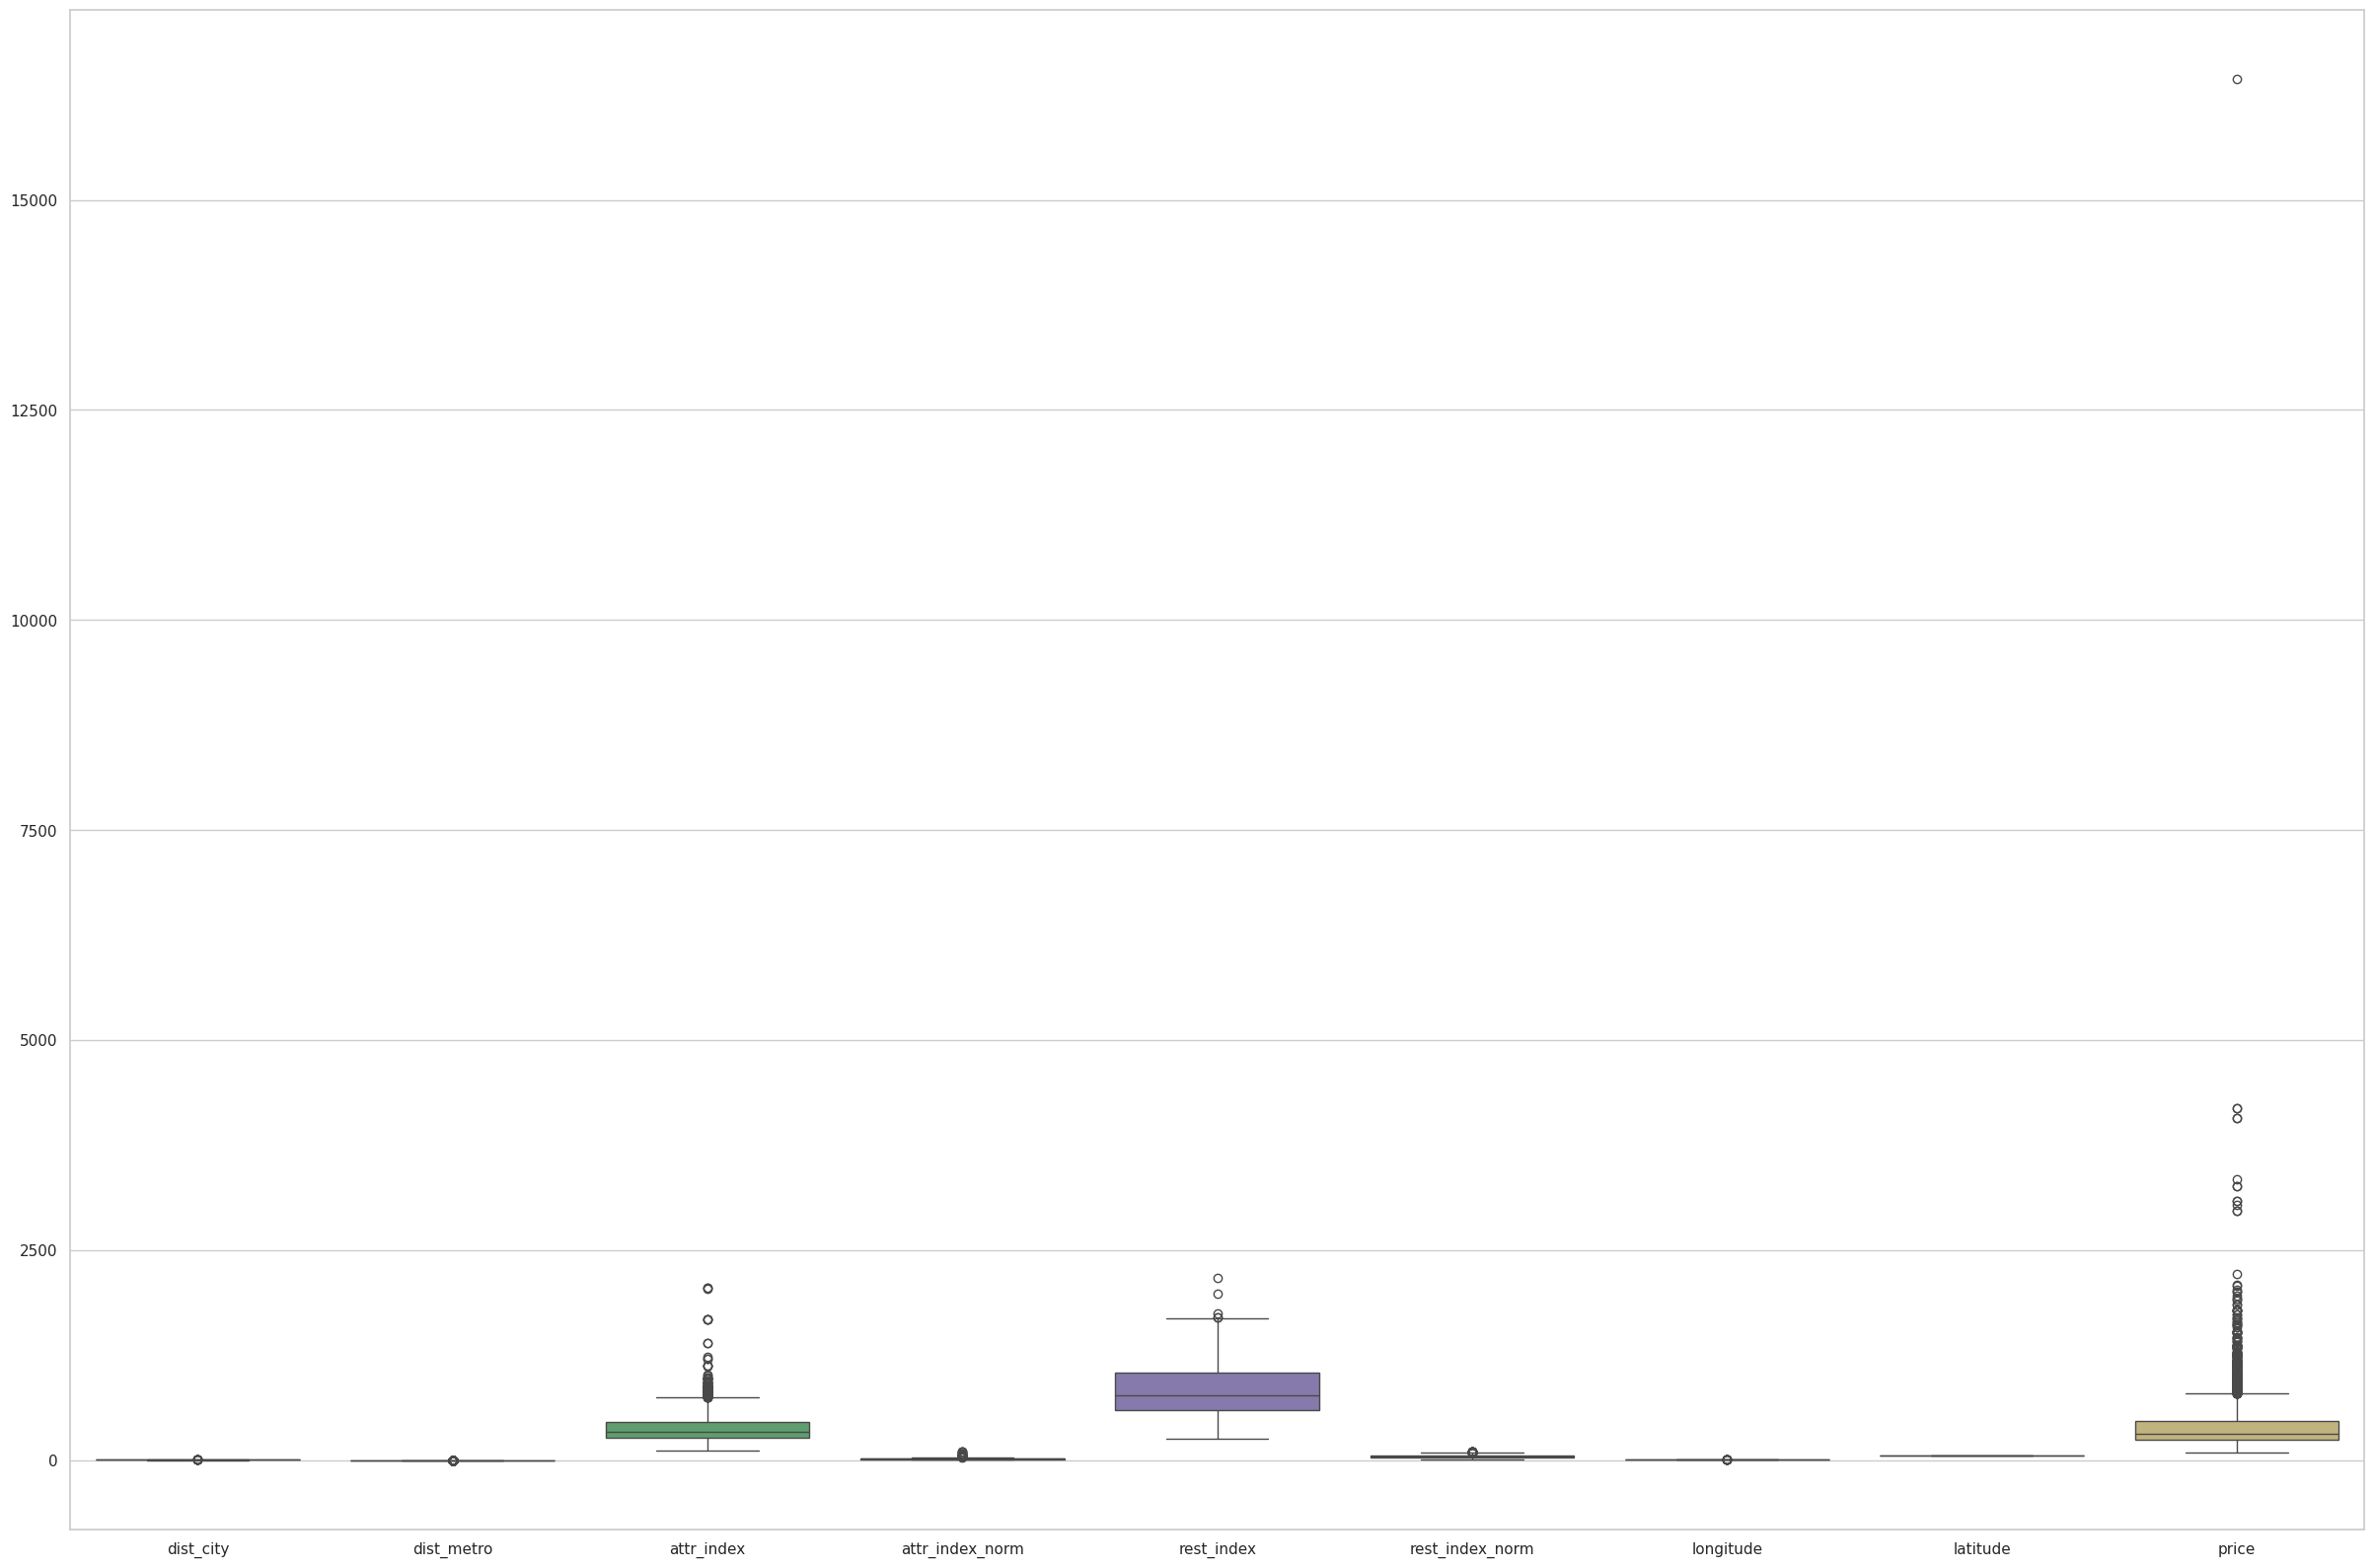

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(30, 20))

# Specify the correct column names in a list format
columns_to_plot = ['dist_city','dist_metro','attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm','longitude','latitude','price']

# Use the correct syntax to select and plot multiple columns
sns.boxplot(data=house_data[columns_to_plot])

plt.show()


***Handling outliers***

In [95]:
#Define the Function to Cap Outliers
def cap_outliers(data, column):
    Q1 = house_data[column].quantile(0.25)
    Q3 = house_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    house_data[column] = house_data[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return data

#List of Numeric Columns
numeric_columns = ['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm','price']

#Loop Through Each Column and Cap Outliers
for column in numeric_columns:
    house_data = cap_outliers(house_data, column)

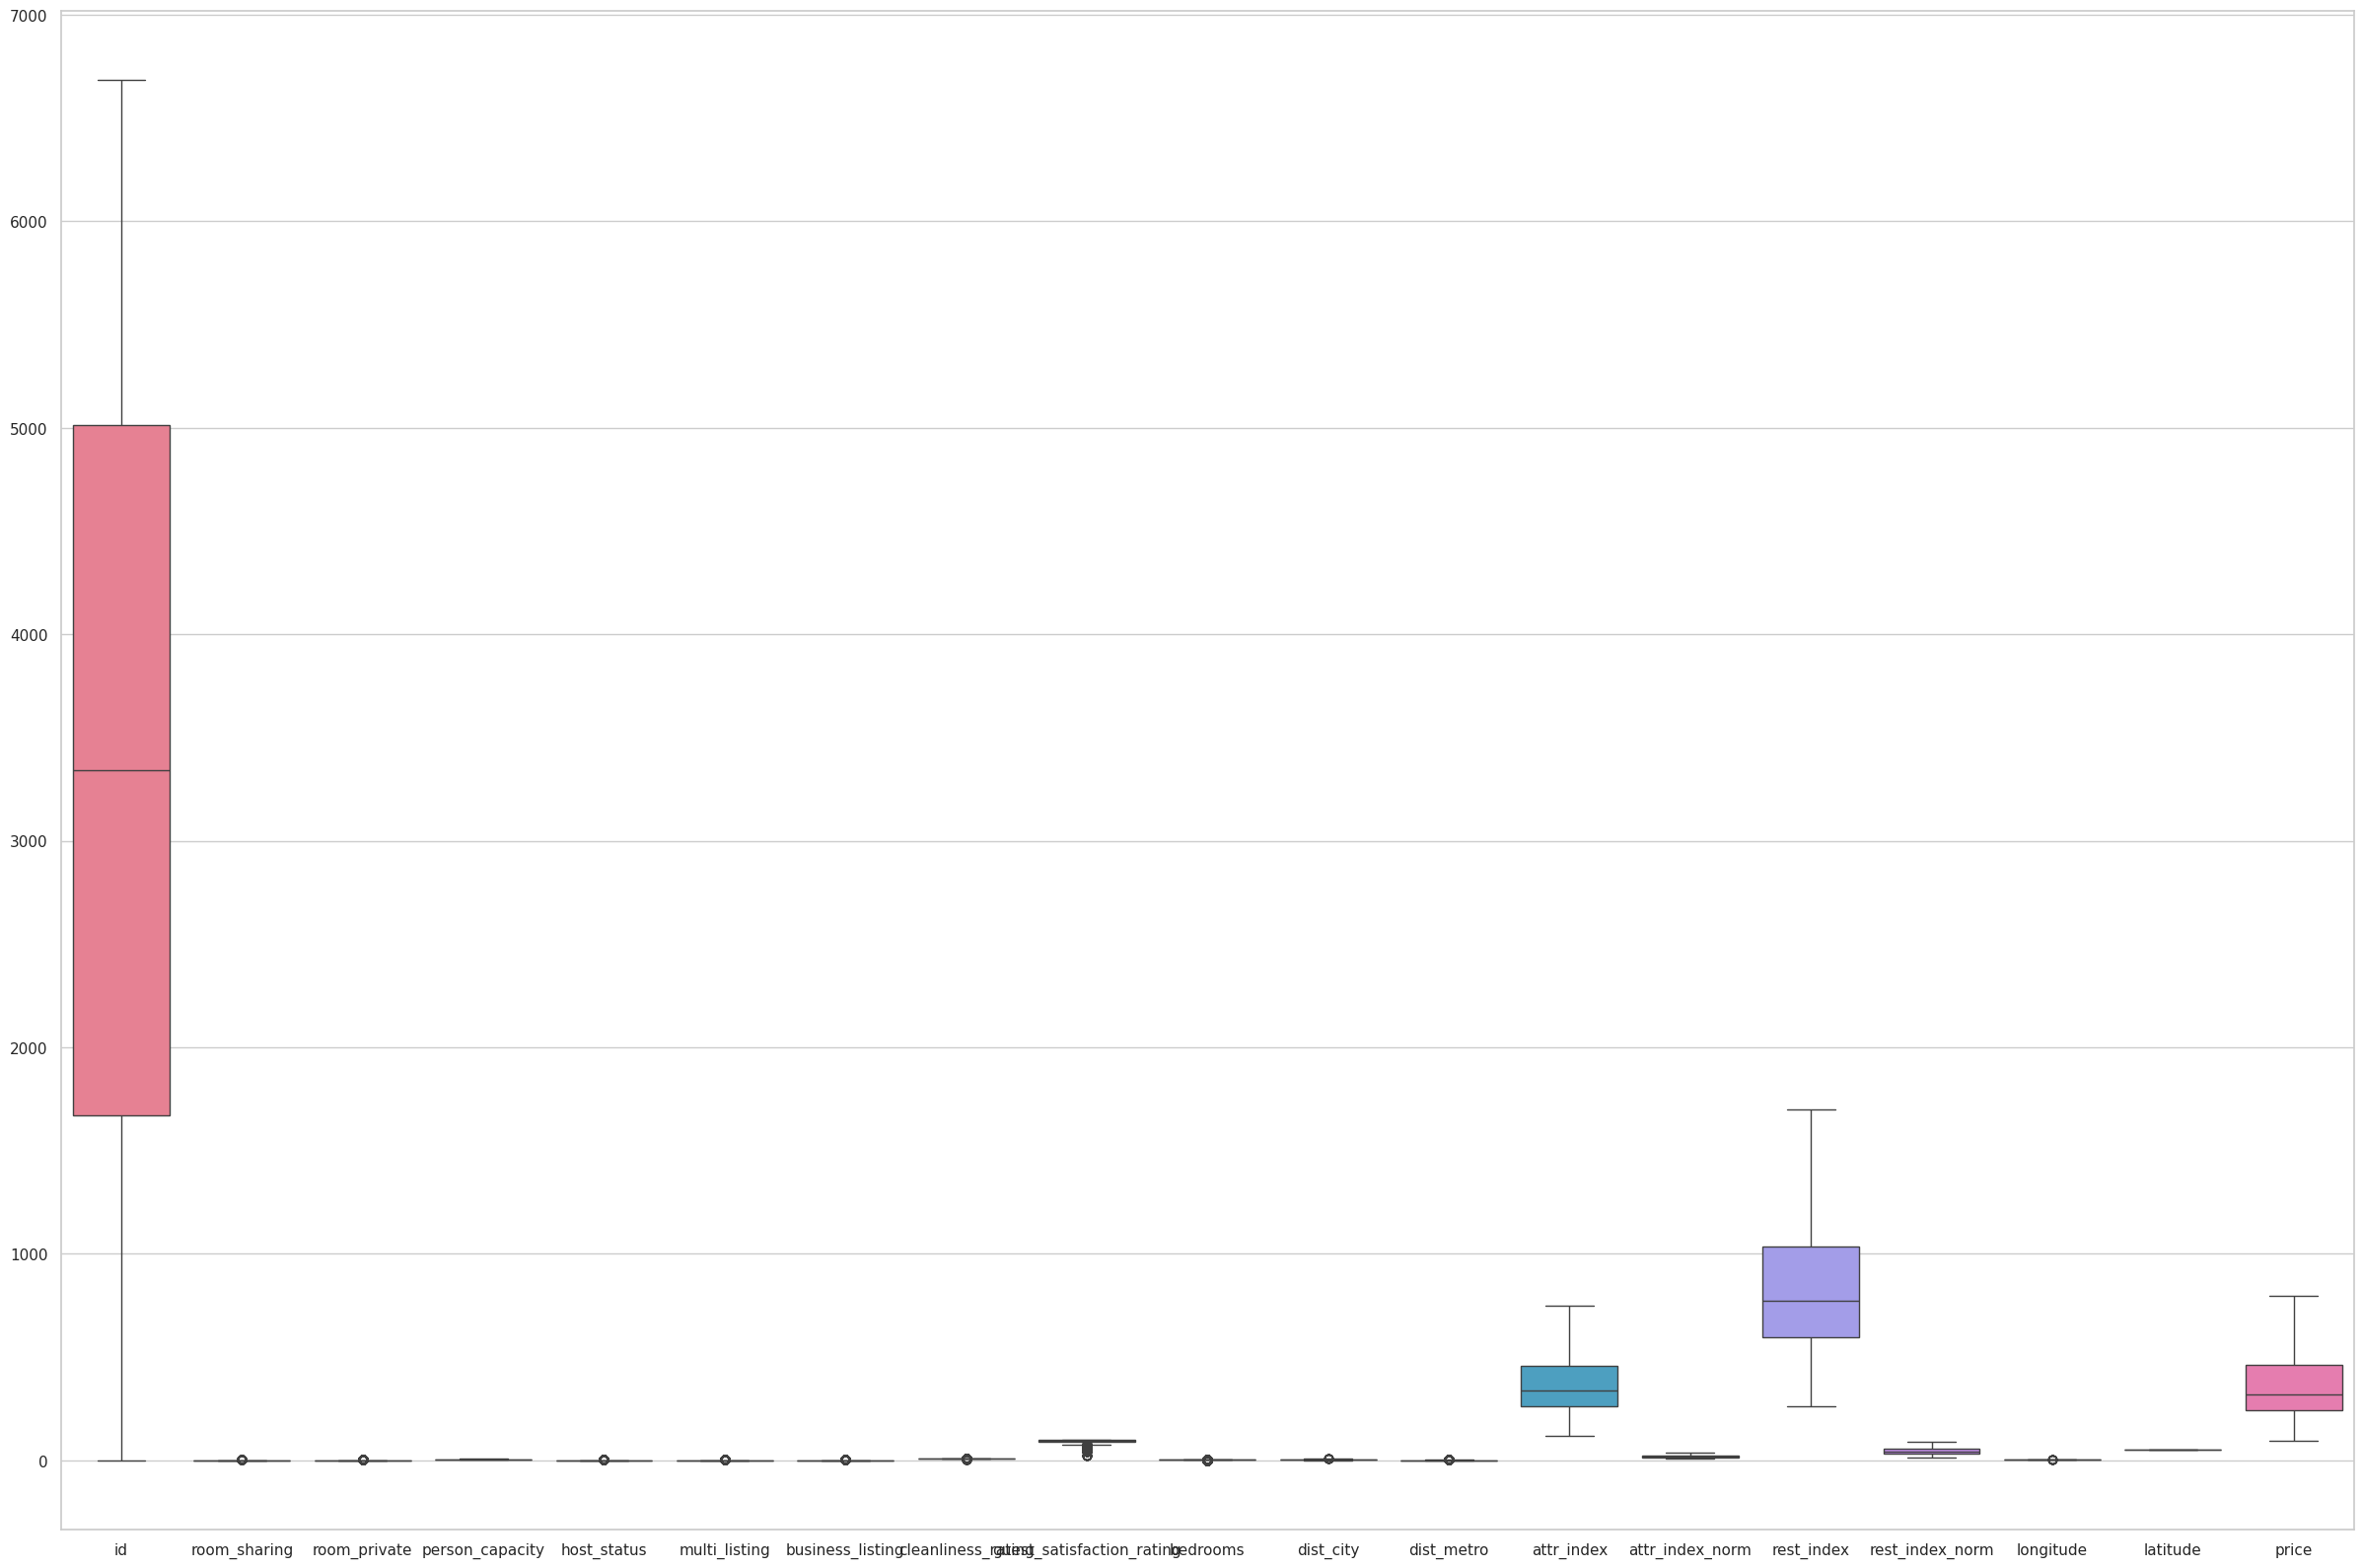

In [96]:
plt.figure(figsize=(30, 20))

# Specify the correct column names in a list format
columns_to_plot = ['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm','price']

# Use the correct syntax to select and plot multiple columns
sns.boxplot(data=house_data)

plt.show()

## **Descriptive Statistics:**

**Summarizing the dataset with key statistics for each column**

In [97]:
skim(house_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6688   │ │ float64     │ 9     │                                                          │
│ │ Number of columns │ 20     │ │ int64       │ 7     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 3     │                                                          │
│                                │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA ┃ NA % ┃ mean   ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ id                    │  0 │    0 │   3344 │    1931 │       0 │   1672 │   3344 │   5015 │  6687 │ ▇▇▇▇▇▇ │  │
│ │ person_capacity       │  0 │    0 │  2.954 │   1.215 │       2 │      2 │      2 │      4 │     6 │ ▇▁ ▃▁▁ │  │
│ │ multi_listing         │  0 │    0 │ 0.2195 │  0.4139 │       0 │      0 │      0 │      0 │     1 │ ▇    ▂ │  │
│ │ business_listing      │  0 │    0 │ 0.2458 │  0.4306 │       0 │      0 │      0 │      0 │     1 │ ▇    ▃ │  │
│ │ cleanliness_rating    │  0 │    0 │  9.264 │   0.974 │       2 │      9 │      9 │     10 │    10 │     ▁▇ │  │
│ │ guest_satisfaction_ra │  0 │    0 │  92.04 │   8.818 │      20 │     89 │     94 │     98 │   100 │     ▁▇ │  │
│ │ ting                  │    │      │        │         │         │        │        │        │       │        │  │
│ │ bedrooms              │  0 │    0 │ 0.9728 │  0.6426 │       0 │      1 │      1 │      1 │     5 │  ▂▇▁   │  │
│ │ dist_city             │  0 │    0 │  2.996 │   1.464 │ 0.07154 │  1.832 │  2.997 │  4.051 │ 7.704 │ ▅▇▇▆▂  │  │
│ │ dist_metro            │  0 │    0 │ 0.2273 │  0.1228 │ 0.00322 │ 0.1424 │ 0.2073 │ 0.2905 │ 1.155 │  ▇▇▁   │  │
│ │ attr_index            │  0 │    0 │  370.6 │   144.7 │   116.3 │  262.3 │  337.9 │  456.3 │ 747.2 │ ▃▇▆▃▂▂ │  │
│ │ attr_index_norm       │  0 │    0 │  18.03 │   7.042 │   5.655 │  12.76 │  16.45 │   22.2 │ 36.36 │ ▃▇▆▃▂▂ │  │
│ │ rest_index            │  0 │    0 │  818.6 │   283.1 │   258.7 │  594.6 │  771.2 │   1037 │  1700 │ ▃▇▆▅▂  │  │
│ │ rest_index_norm       │  0 │    0 │  42.56 │   15.59 │   11.93 │  30.16 │  40.37 │  53.07 │ 87.45 │ ▃▇▇▅▂▁ │  │
│ │ longitude             │  0 │    0 │  2.343 │ 0.03372 │   2.248 │  2.322 │  2.346 │  2.367 │ 2.439 │ ▁▃▆▇▃  │  │
│ │ latitude              │  0 │    0 │  48.86 │ 0.01741 │   48.82 │  48.85 │  48.87 │  48.88 │  48.9 │ ▁▃▆▇▆▂ │  │
│ │ price                 │  0 │    0 │  369.6 │     178 │   92.74 │  240.9 │  317.6 │  462.1 │ 793.8 │ ▃▇▅▂▁▂ │  │
│ └───────────────────────┴────┴──────┴────────┴─────────┴─────────┴────────┴────────┴────────┴───────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ true         

**The skimpy summary shows that:**

The number of **float** types is 9, then the second most common type is **int**, which has 7 features, but there is just one **string** feature.

According to the results of **the number columns**, there are **no missing values**; additionally, the important statistics of each column shown (**mean, median**, etc.)

For the **bool features**, there are 3: "room_sharing, room_private, host_status." The true rate of them is sequentially "0.014, 0.23, 0.14".

In [98]:
from scipy.stats import skew, kurtosis, pearsonr, spearmanr
# Shape of Distribution
skewness_price = skew(house_data['price'])
kurtosis_price = kurtosis(house_data['price'])

print("\nShape of Distribution:")
print(f"Skewness: {skewness_price}")
print(f"Kurtosis: {kurtosis_price}")


Shape of Distribution:
Skewness: 0.9829573660624964
Kurtosis: 0.12286793376276695


**Skewness: 0.983**

**Positive Skew** (Right Skew): A skewness value of **0.983** indicates that the  data distribution is positively skewed. This suggests that there are more houses with prices below the mean and a few houses with prices that are significantly higher than the mean.

**Kurtosis: 0.123**

**Near Zero Kurtosis:** A kurtosis value of **0.123** is close to zero, indicating that the distribution has a kurtosis close to that of a normal distribution (which has a kurtosis of 0). This suggests that the distribution has tails similar to a normal distribution and doesn't have an unusually high number of extreme values (outliers).

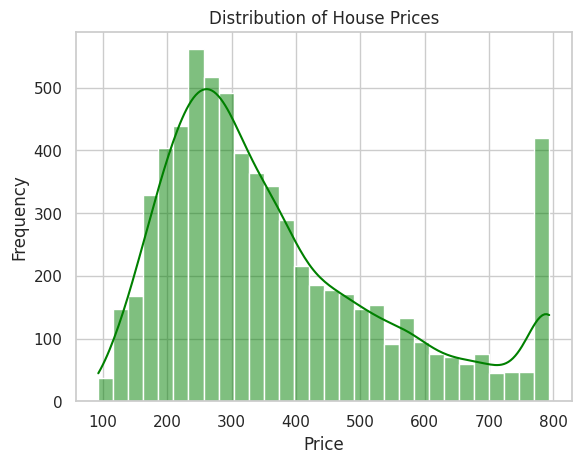

In [99]:
# Histogram
sns.histplot(house_data['price'], kde=True, color='green')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Pearson and Spearman Correlation between price and attr_index

Pearson Correlation between price and attr_index: 0.4147 (p-value: 0.0000)
Spearman Correlation between price and attr_index: 0.4574 (p-value: 0.0000)


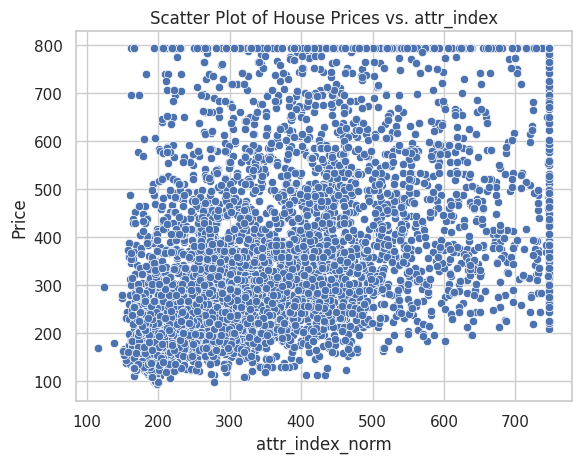

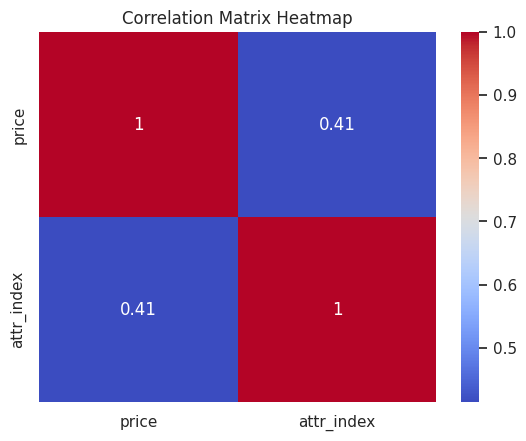

In [100]:
# Calculate Pearson Correlation
pearson_corr, pearson_p_value = pearsonr(house_data['price'], house_data['attr_index'])
print(f"Pearson Correlation between price and attr_index: {pearson_corr:.4f} (p-value: {pearson_p_value:.4f})")

# Calculate Spearman Correlation
spearman_corr, spearman_p_value = spearmanr(house_data['price'], house_data['attr_index'])
print(f"Spearman Correlation between price and attr_index: {spearman_corr:.4f} (p-value: {spearman_p_value:.4f})")

# Visualize Correlation with a Scatter Plot
sns.scatterplot(x='attr_index', y='price', data=house_data)
plt.title('Scatter Plot of House Prices vs. attr_index')
plt.xlabel('attr_index_norm')
plt.ylabel('Price')
plt.show()

# Heatmap of Correlation Matrix
correlation_matrix = house_data[['price', 'attr_index']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


* Both correlation coefficients **(Pearson and Spearman)** suggest a moderate ***positive relationship*** between price and attr_index.
* The **low p-values** indicate that these relationships are statistically significant, ***reinforcing the reliability of the observed correlations***.
* These findings suggest that as the **attr_index** ***increases***, there is a tendency for **price** to ***increase***, although the strength of the relationship is moderate rather than strong.

## Subplots
Use the function **regplot** in the seaborn library to determine if the feature is negatively or positively correlated with price.

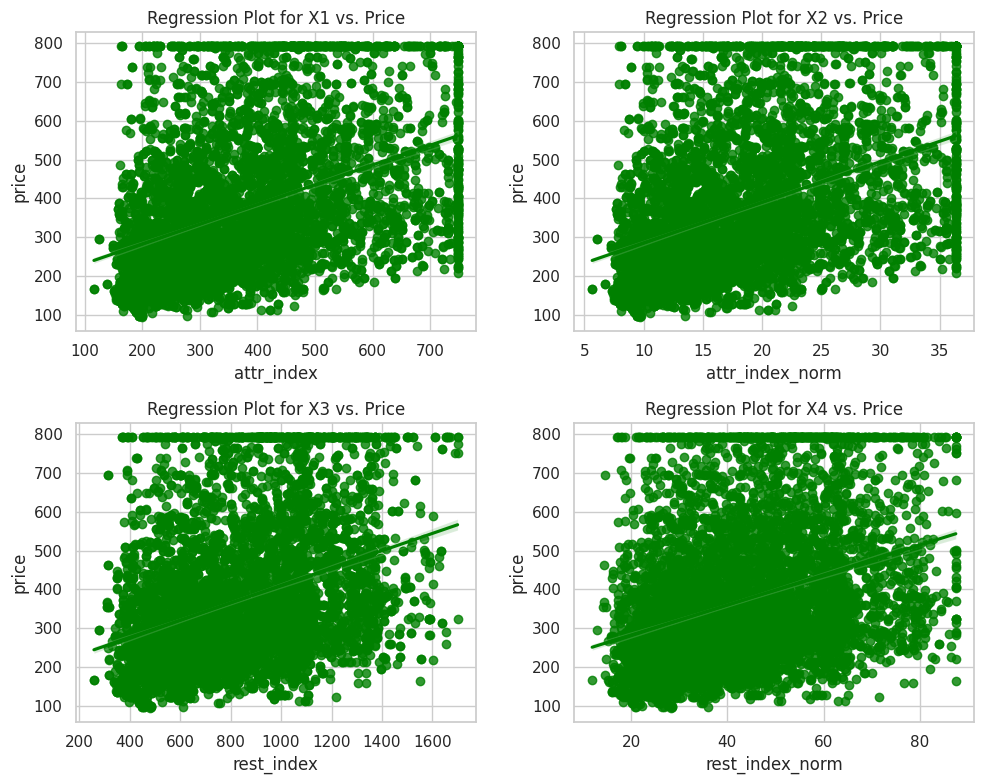

In [101]:
# Create subplots for multiple regression plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create regression plots for each variable with 'coolwarm' colormap
sns.regplot(x='attr_index', y='price', data=house_data, ax=axes[0, 0], color='green')
axes[0, 0].set_title('Regression Plot for X1 vs. Price')

sns.regplot(x='attr_index_norm', y='price', data=house_data, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Regression Plot for X2 vs. Price')

sns.regplot(x='rest_index', y='price', data=house_data, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Regression Plot for X3 vs. Price')

sns.regplot(x='rest_index_norm', y='price', data=house_data, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Regression Plot for X4 vs. Price')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## **Visualisation**

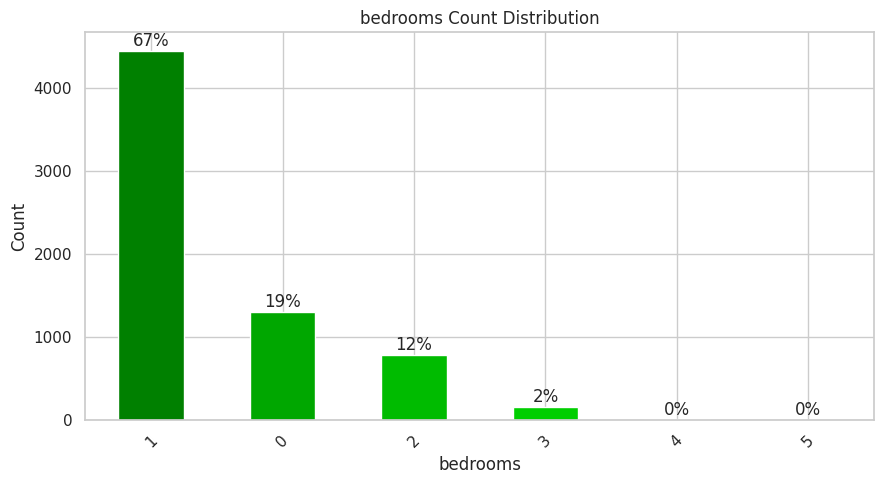

In [102]:
# Count the values of the 'bedrooms' column
value_counts = house_data['bedrooms'].value_counts()

# Create a bar plot
plt.figure(figsize=(9, 5))
ax = value_counts.plot(kind='bar', color=['#008000', '#00a700', '#00bb00', '#00ce00', '#00ce00', '#006c00'])

# Add percentage labels above each bar
total = len(house_data)
for i, v in enumerate(value_counts):
    percentage = (v / total) * 100
    ax.text(i, v + 10, f'{percentage:.0f}%', ha='center', va='bottom')

plt.xlabel('bedrooms')
plt.ylabel('Count')
plt.title('bedrooms Count Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-103-eb1b2b4078b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='person_capacity', y='price', data=house_data, palette='Greens')


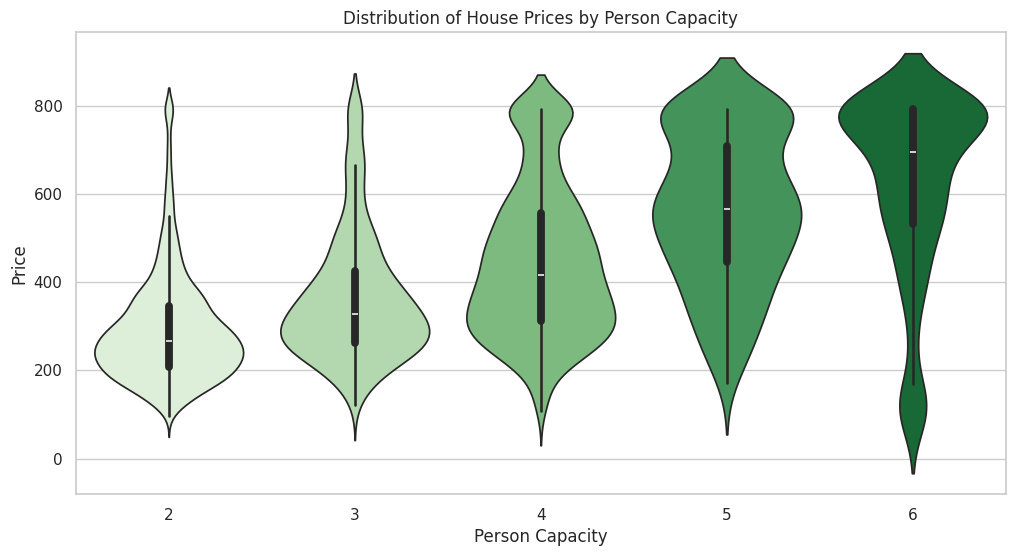

In [103]:
# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='person_capacity', y='price', data=house_data, palette='Greens')
plt.title('Distribution of House Prices by Person Capacity')
plt.xlabel('Person Capacity')
plt.ylabel('Price')
plt.show()

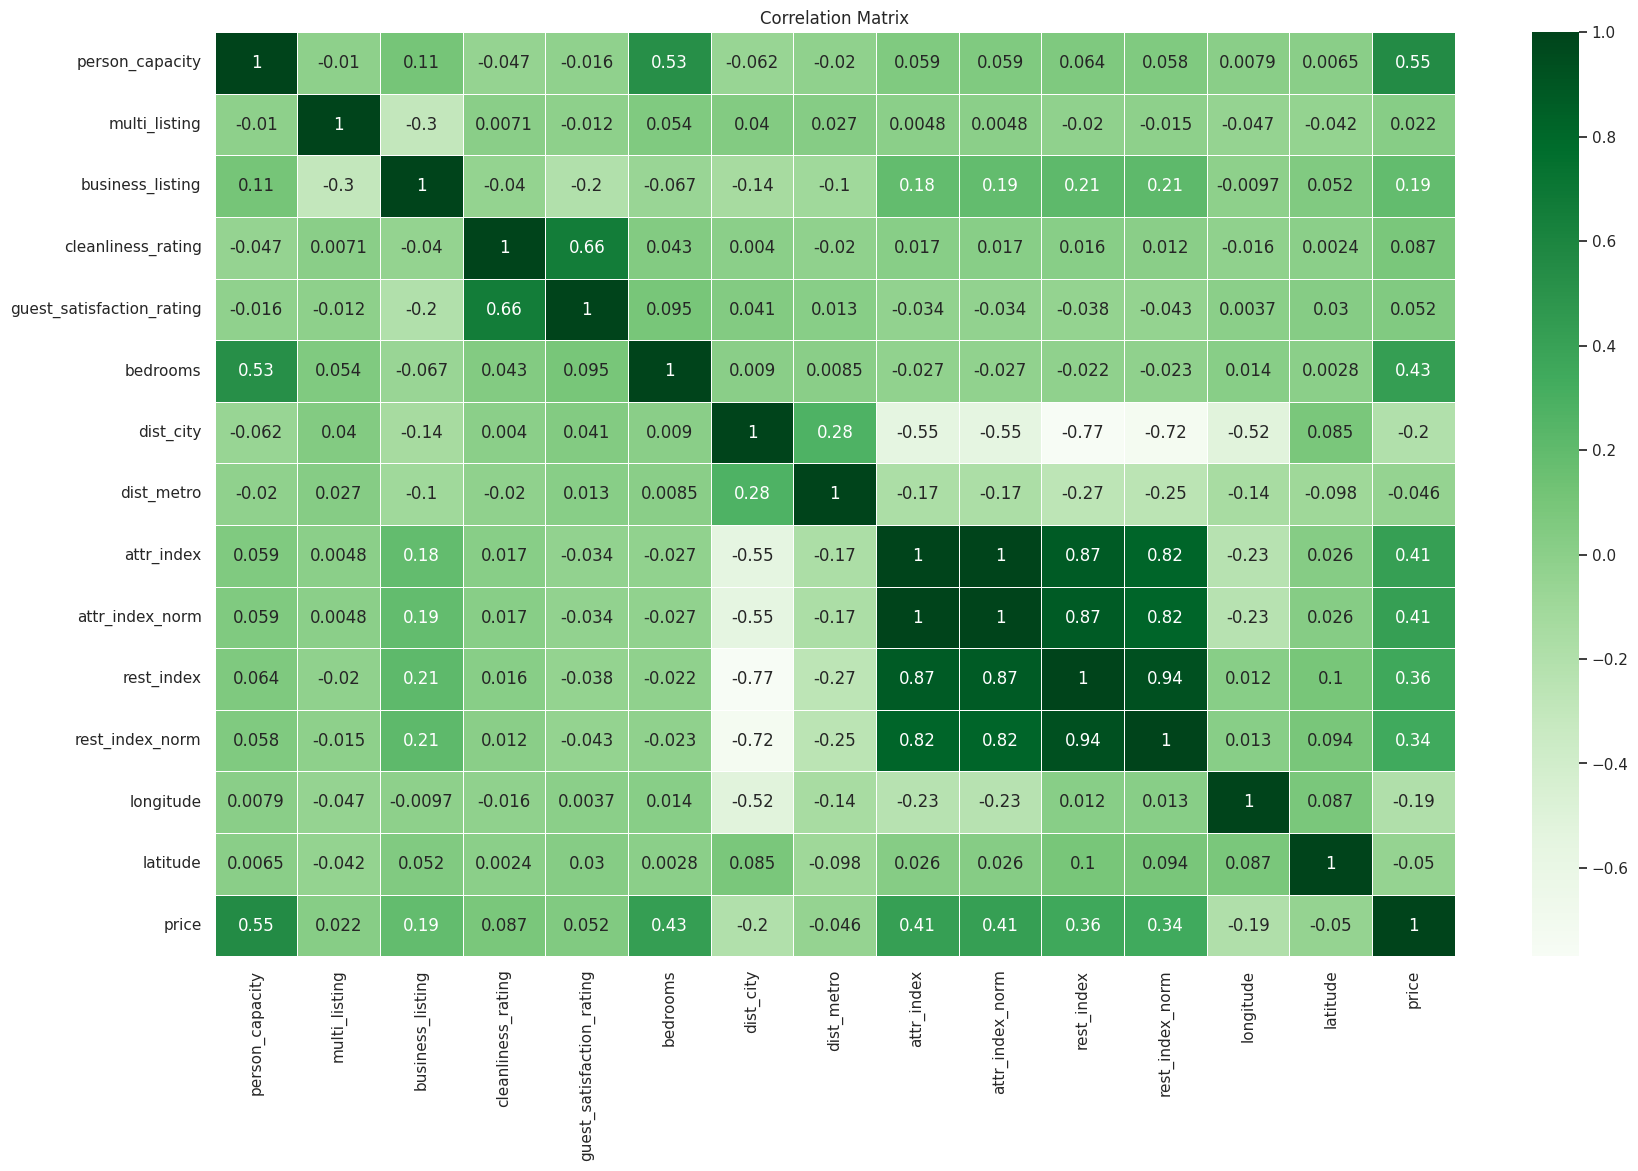

In [104]:
# Convert non-numeric columns to numeric using one-hot encoding
data = ['person_capacity','multi_listing', 'business_listing',
       'cleanliness_rating', 'guest_satisfaction_rating', 'bedrooms',
       'dist_city', 'dist_metro', 'attr_index', 'attr_index_norm',
       'rest_index', 'rest_index_norm', 'longitude', 'latitude', 'price']

subset_data =house_data[data]

# Calculate the correlation matrix
corr_matrix = subset_data.corr()

# Create a heatmap with green colors
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Strong Correlation:** person_capacity, bedrooms, attr_index, attr_indedx_norm and price.

**Moderate Correlation:** rest_index, rest_index_norm and Price;

**Weak Correlation:** The rest of the attributes;